# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        # Locate the calling agents within the API documentation to access specific data points
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | al jumum
Processing Record 4 of Set 1 | ried im innkreis
Processing Record 5 of Set 1 | nizhnesortymskiy
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | lazaro cardenas
Processing Record 8 of Set 1 | griffith
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | alice springs
Processing Record 12 of Set 1 | batang
Processing Record 13 of Set 1 | puerto deseado
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | bubaque
Processing Record 16 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 17 of Set 1 | invercargill
Processing Record 18 of Set 1 | el limon
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | touros
Processing Record 21 of Set 1 | hauterive

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,12.12,98,100,1.79,NZ,1690228550
1,al jumum,21.6169,39.6981,34.97,19,51,1.74,SA,1690228551
2,ried im innkreis,48.2112,13.4886,19.36,95,100,2.72,AT,1690228552
3,nizhnesortymskiy,62.4397,71.7603,17.95,79,100,1.52,RU,1690228553
4,adamstown,-25.0660,-130.1015,19.89,68,50,3.34,PN,1690228553


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,12.12,98,100,1.79,NZ,1690228550
1,al jumum,21.6169,39.6981,34.97,19,51,1.74,SA,1690228551
2,ried im innkreis,48.2112,13.4886,19.36,95,100,2.72,AT,1690228552
3,nizhnesortymskiy,62.4397,71.7603,17.95,79,100,1.52,RU,1690228553
4,adamstown,-25.0660,-130.1015,19.89,68,50,3.34,PN,1690228553


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

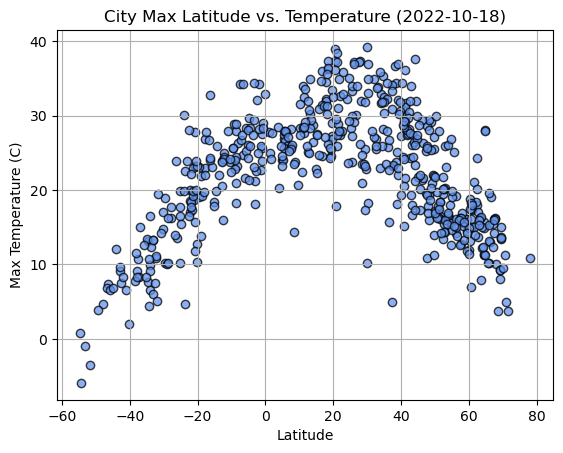

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], c="cornflowerblue", alpha= 0.75, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

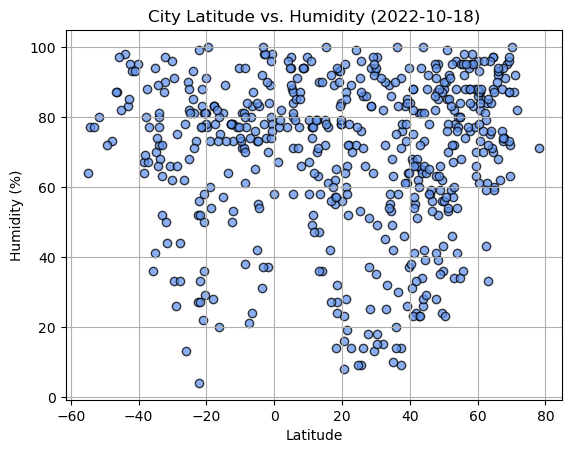

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], c="cornflowerblue", alpha= 0.75, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

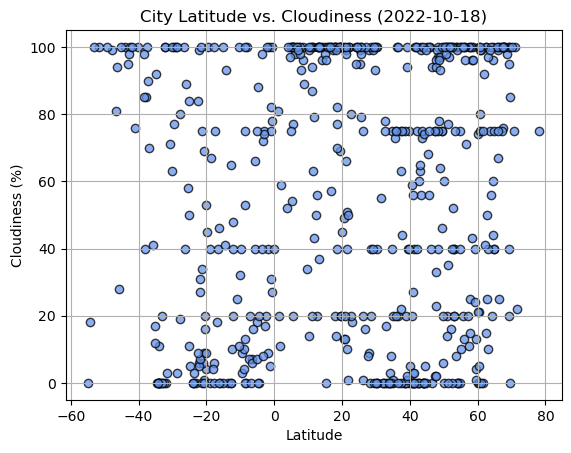

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], c="cornflowerblue", alpha= 0.75, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

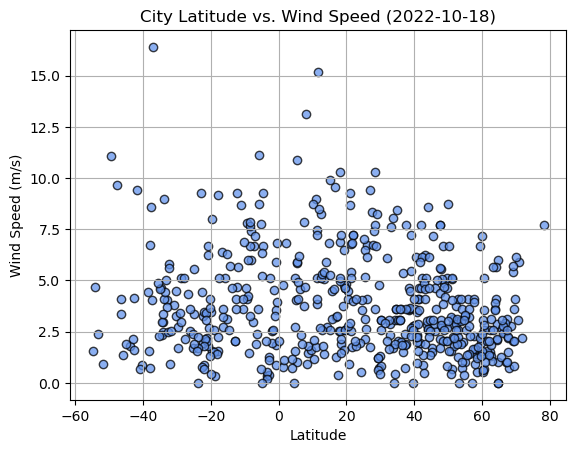

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], c="cornflowerblue", alpha= 0.75, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,al jumum,21.6169,39.6981,34.97,19,51,1.74,SA,1690228551
2,ried im innkreis,48.2112,13.4886,19.36,95,100,2.72,AT,1690228552
3,nizhnesortymskiy,62.4397,71.7603,17.95,79,100,1.52,RU,1690228553
5,lazaro cardenas,17.9583,-102.2000,32.19,55,100,2.53,MX,1690228553
6,griffith,41.5284,-87.4237,31.70,55,100,4.12,US,1690228553


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,12.12,98,100,1.79,NZ,1690228550
4,adamstown,-25.0660,-130.1015,19.89,68,50,3.34,PN,1690228553
9,alice springs,-23.7000,133.8833,4.75,81,0,0.00,AU,1690228543
10,batang,-6.4846,110.7083,24.67,83,7,2.39,ID,1690228556
11,puerto deseado,-47.7503,-65.8938,4.64,73,99,9.66,AR,1690228292


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.4398202302459267


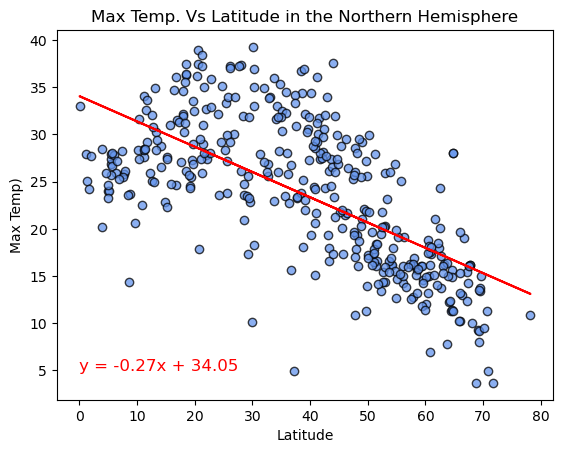

In [131]:
# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"], c="cornflowerblue", alpha= 0.75, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp)")
plt.title("Max Temp. Vs Latitude in the Northern Hemisphere")

# Perform a linear regression on Latitude vs. Max Temp in 
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

#Calculate the regression line values
regress_values = slope * northern_hemi_df["Lat"] + intercept
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (0,5), fontsize=12, c="r")

# Print r value
print(f"The r-value is: {rvalue**2}")

The r-value is: 0.7472971330130532
----------------------------
Linear Relationship Discussion between Max. Temp and Latitude
As cities in the Northern Hemisphere move farther away from the equator, temperatures tend to drop.
This proves a strong negative correlation between latitude and temperatures.
----------------------------
As cities in the Southern Hemisphere move closer to the equator, temperatures rise
This proves a strong positive correlation between latitude and temperatures.
----------------------------
Cities located near the equator tend to experience hotter weather, while cities further away from the equation 
will experience colder temperatures


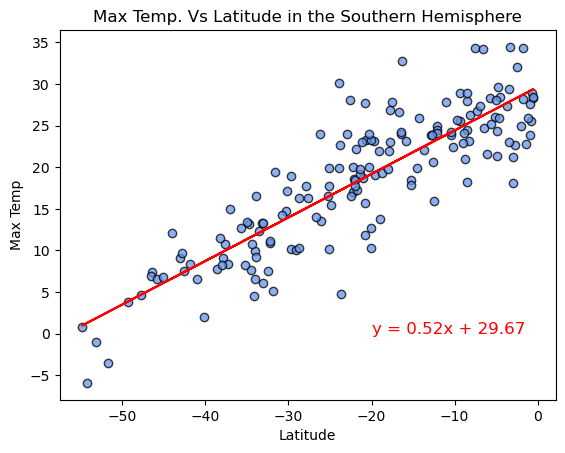

In [130]:
# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"], c="cornflowerblue", alpha= 0.75, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Max Temp. Vs Latitude in the Southern Hemisphere")

# Perform a linear regression on Latitude vs. Max Temp in 
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

#Calculate the regression line values
regress_values = slope * southern_hemi_df["Lat"] + intercept
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (-20,0), fontsize=12, c="r")

# Print r value
print(f"The r-value is: {rvalue**2}")


In [135]:
#Linear Relationship Discussion between Max. Temp and Latitude
print("Linear Relationship Discussion between Max. Temp and Latitude")
print("----------------------------")
print("As cities in the Northern Hemisphere move farther away from the equator, temperatures tend to drop.")
print("This proves a strong negative correlation between latitude and temperatures.")
print("----------------------------")
print("As cities in the Southern Hemisphere move closer to the equator, temperatures rise")
print("This proves a strong positive correlation between latitude and temperatures.")
print("----------------------------")
print("Cities located near the equator tend to experience hotter weather, while cities further away from the equation \n"  
      "will experience colder temperatures")

Linear Relationship Discussion between Max. Temp and Latitude
----------------------------
As cities in the Northern Hemisphere move farther away from the equator, temperatures tend to drop.
This proves a strong negative correlation between latitude and temperatures.
----------------------------
As cities in the Southern Hemisphere move closer to the equator, temperatures rise
This proves a strong positive correlation between latitude and temperatures.
----------------------------
Cities located near the equator tend to experience hotter weather, while cities further away from the equation 
will experience colder temperatures


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.017237929838529852


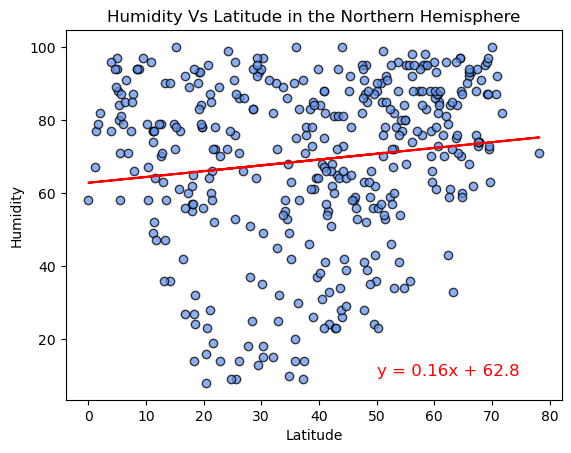

In [98]:
# Northern Hemisphere
# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"], c="cornflowerblue", alpha= 0.75, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity Vs Latitude in the Northern Hemisphere")

# Perform a linear regression on Latitude vs. Max Temp in 
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

#Calculate the regression line values
regress_values = slope * northern_hemi_df["Lat"] + intercept
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (50,10), fontsize=12, c="r")

# Print r value
print(f"The r-value is: {rvalue**2}")

The r-value is: 0.002639256503403154


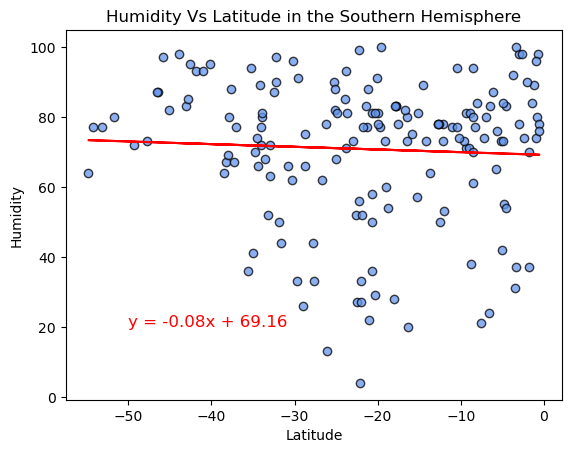

In [136]:
# Southern Hemisphere
# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"], c="cornflowerblue", alpha= 0.75, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity Vs Latitude in the Southern Hemisphere")

# Perform a linear regression on Latitude vs. Max Temp in 
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

#Calculate the regression line values
regress_values = slope * southern_hemi_df["Lat"] + intercept
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (-50,20), fontsize=12, c="r")

# Print r value
print(f"The r-value is: {rvalue**2}")

In [137]:
#Linear Relationship Discussion between Humidity and Latitude
print("Linear Relationship Discussion between Humidity and Latitude")
print("----------------------------")
print("As cities in the Northern Hemisphere move farther away from the equator, humidity levels tend to raise.")
print("This proves a slightly positive correlation between latitude and humidity.")
print("----------------------------")
print("As cities in the Southern Hemisphere move closer to the equator, humidity levels begin to lower.")
print("There is little correlation between latitude and humidity in the Southern Hemisphere.")
print("----------------------------")
print("Cities located further away from the equator are more likely to experience more humid temperatures.")

Linear Relationship Discussion between Humidity and Latitude
----------------------------
As cities in the Northern Hemisphere move farther away from the equator, humidity levels tend to raise.
This proves a slightly positive correlation between latitude and humidity.
----------------------------
As cities in the Southern Hemisphere move closer to the equator, humidity levels begin to lower.
There is little correlation between latitude and humidity in the Southern Hemisphere.
----------------------------
Cities located further away from the equator are more likely to experience more humid temperatures.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.009599764291933354


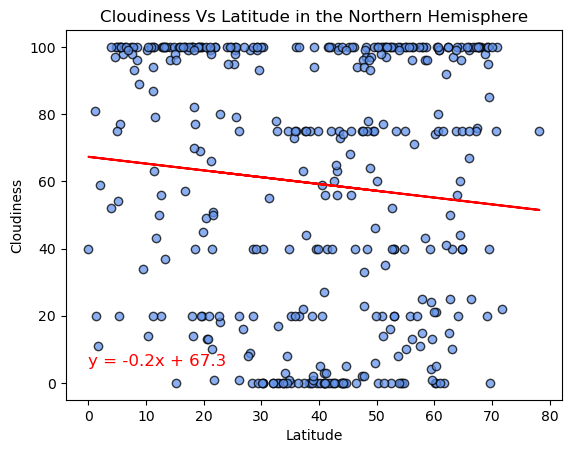

In [104]:
# Northern Hemisphere
# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"], c="cornflowerblue", alpha= 0.75, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness Vs Latitude in the Northern Hemisphere")

# Perform a linear regression on Latitude vs. Max Temp in Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

#Calculate the regression line values
regress_values = slope * northern_hemi_df["Lat"] + intercept
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (0,5), fontsize=12, c="r")

# Print r value
print(f"The r-value is: {rvalue**2}")

The r-value is: 0.0452499680775199


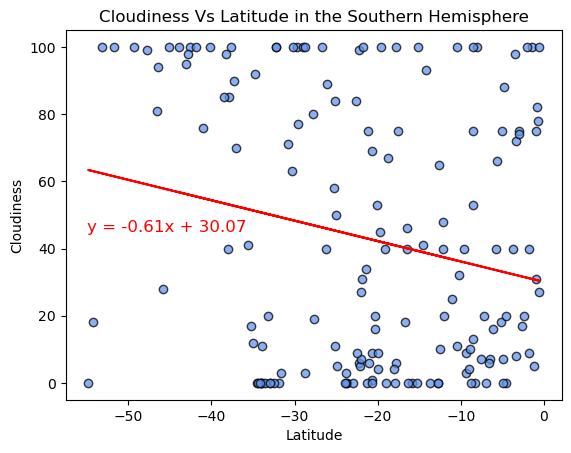

In [138]:
# Southern Hemisphere
# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"], c="cornflowerblue", alpha= 0.75, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness Vs Latitude in the Southern Hemisphere")

# Perform a linear regression on Latitude vs. Max Temp in Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

#Calculate the regression line values
regress_values = slope * southern_hemi_df["Lat"] + intercept
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (-55,45), fontsize=12, c="r")

# Print r value
print(f"The r-value is: {rvalue**2}")

In [141]:
#Linear Relationship Discussion between Cloudiness and Latitude
print("Linear Relationship Discussion between Cloudiness and Latitude")
print("----------------------------")
print("As cities in the Northern Hemisphere move farther away from the equator, there is a probable chance it will be cloudy.")
print("There is little correlation between latitude and cloudiness in the Northern Hemisphere.")
print("----------------------------")
print("As cities in the Southern Hemisphere move closer to the equator, there is a lower chance for cloud coverage.")
print("There is a strong negative correlation between latitude and cloudiness in the Southern Hemisphere.")
print("----------------------------")
print("Cities located further away from the equator are more likely to experience cloudiness.")

Linear Relationship Discussion between Cloudiness and Latitude
----------------------------
As cities in the Northern Hemisphere move farther away from the equator, there is a probable chance it will be cloudy.
There is little correlation between latitude and cloudiness in the Northern Hemisphere.
----------------------------
As cities in the Southern Hemisphere move closer to the equator, there is a lower chance for cloud coverage.
There is a strong negative correlation between latitude and cloudiness in the Southern Hemisphere.
----------------------------
Cities located further away from the equator are more likely to experience cloudiness.


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07296140967905484


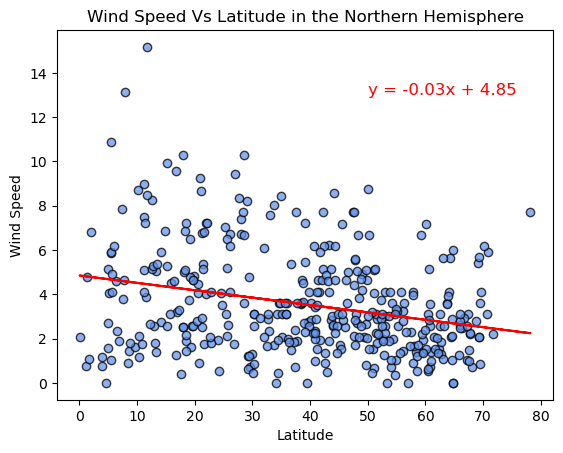

In [121]:
# Northern Hemisphere
# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"], c="cornflowerblue", alpha= 0.75, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed Vs Latitude in the Northern Hemisphere")

# Perform a linear regression on Latitude vs. Max Temp in Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

#Calculate the regression line values
regress_values = slope * northern_hemi_df["Lat"] + intercept
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (50,13), fontsize=12, c="r")

# Print r value
print(f"The r-value is: {rvalue**2}")

The r-value is: 0.001174101244023582


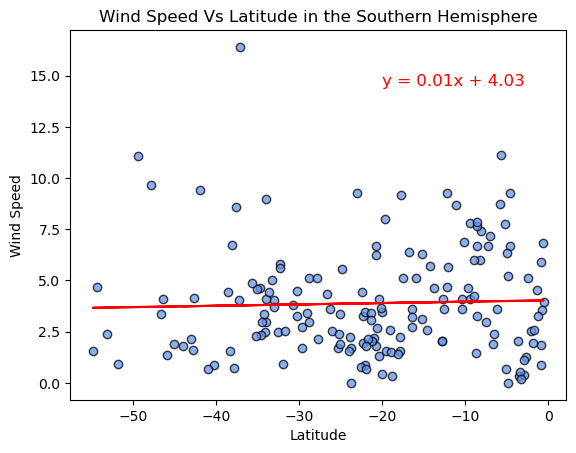

In [118]:
# Southern Hemisphere
# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"], c="cornflowerblue", alpha= 0.75, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed Vs Latitude in the Southern Hemisphere")

# Perform a linear regression on Latitude vs. Max Temp in Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

#Calculate the regression line values
regress_values = slope * southern_hemi_df["Lat"] + intercept
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (-20,14.5), fontsize=12, c="r")

# Print r value
print(f"The r-value is: {rvalue**2}")

In [123]:
print("Linear Relationship Discussion between Wind Speed and Latitude")
print("----------------------------")
print("In both the Northern and Southern Hemispheres, there is little correlation between latitude and wind speeds.")

Linear Relationship Discussion between Wind Speed and Latitude
----------------------------
In both the Northern and Southern Hemispheres, there is little correlation between latitude and wind speeds.
